<a href="https://colab.research.google.com/github/Kunal890498/Credit_Card_Fraud_Detection/blob/main/Atom_Economy_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
data = pd.read_csv("chemical_reactions.csv")
# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())



FileNotFoundError: [Errno 2] No such file or directory: 'chemical_reactions.csv'

<ipython-input-15-bcfac476e68f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


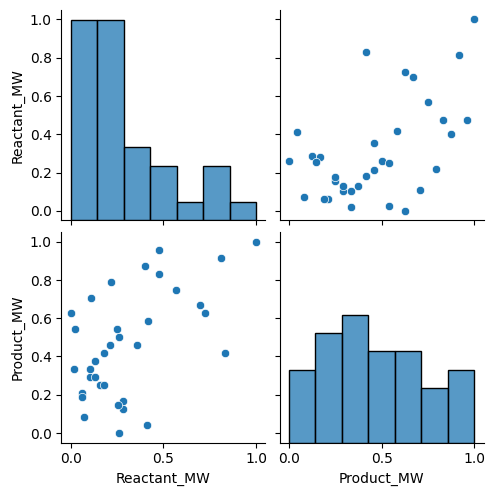

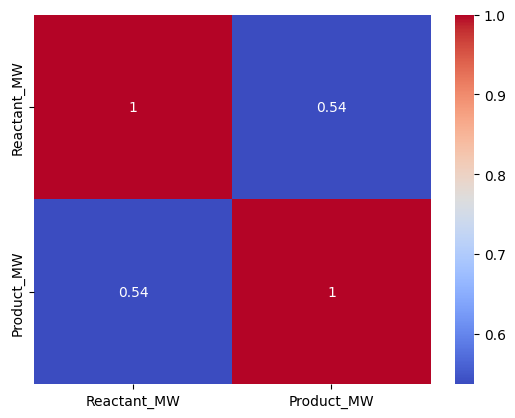

In [ ]:
# Step 2: Handle missing values (if any)
data.fillna(method="ffill", inplace=True)

# Step 3: Normalize the data (optional, but useful for scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[['Reactant_MW', 'Product_MW']]), columns=['Reactant_MW', 'Product_MW'])

# Step 4: Exploratory Data Analysis (EDA)
# Pairplot to visualize relationships
sns.pairplot(data_normalized)
plt.show()

# Heatmap for correlation
sns.heatmap(data_normalized.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Step 5: Predictive Modeling for Atom Economy
# Features and target variable
X = data_normalized[['Reactant_MW']]  # Use Reactant_MW as the feature
y = data['Product_MW']  # Use Product_MW as the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict Product_MW
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 5255.27


Optimal Reactant Molecular Weight to Maximize Product Molecular Weight:
Reactant_MW    0.475186
Name: 12, dtype: float64


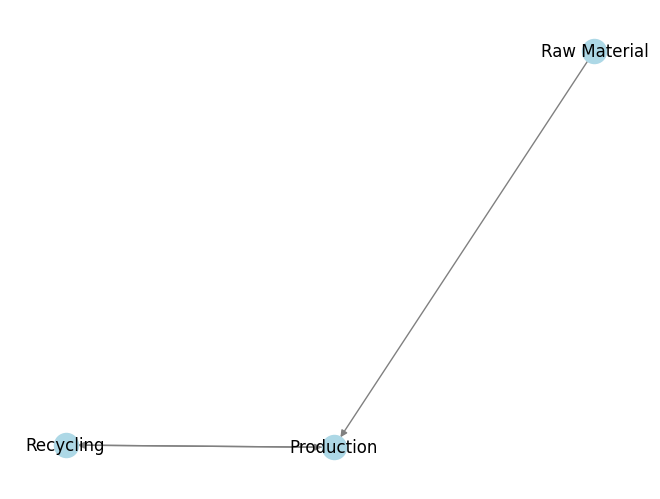

In [ ]:
# Step 6: Process Optimization
# Identify optimal Reactant_MW to maximize Product_MW
optimal_reactant_mw = X_train.iloc[np.argmax(model.predict(X_train))]
print("Optimal Reactant Molecular Weight to Maximize Product Molecular Weight:")
print(optimal_reactant_mw)

# Step 7: Circular Economy Simulation
import networkx as nx

# Create a graph to model resource flows
G = nx.DiGraph()

# Add nodes (e.g., processes, resources)
G.add_node("Raw Material")
G.add_node("Production")
G.add_node("Recycling")

# Add edges (e.g., resource flows)
G.add_edge("Raw Material", "Production", weight=100)
G.add_edge("Production", "Recycling", weight=80)
G.add_edge("Recycling", "Production", weight=70)

# Visualize the graph
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

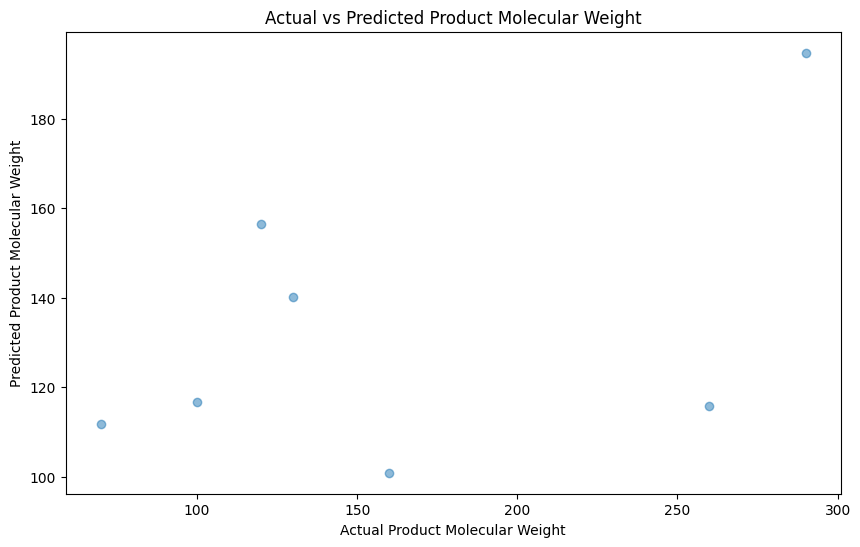

In [ ]:
# Step 8: Visualization and Reporting
# Create a scatter plot of actual vs predicted Product_MW
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Product Molecular Weight")
plt.ylabel("Predicted Product Molecular Weight")
plt.title("Actual vs Predicted Product Molecular Weight")
plt.show()